In [66]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from funciones_2 import *
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# import dataset: MNIST.csv
df = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP4/data/MNIST_dataset.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# print how many values in the table are 0
print('#(Values) == 0: ', (df == 0).sum().sum())
print('#(Values) != 0: ', (df != 0).sum().sum())

#(Values) == 0:  44381528
#(Values) != 0:  10568472


Podemos observar que aproximadamente 4 de cada 5 datos en la tabla son 0.

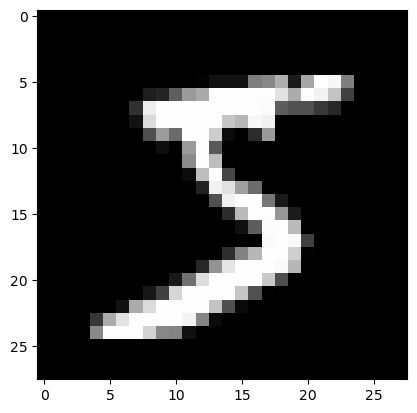

In [49]:
# plot a sample of the dataset as a 28x28 greyscale image
plot_sample(df, 0)

# 1. Reducción de Dimensionalidad
Este problema se basará en el dataset MNIST dataset.csv, que contiene representaciones tabulares de imágenes de dígitos del 0 al 9. Originalmente, cada imagen tiene una resolución de 28x28 píxeles en escala de grises. En este conjunto de datos, cada imagen se representa como una fila de 784 (28x28) valores, donde cada valor representa la intensidad de un pixel en la imagen.
## (a)
 Implementar Principal Component Analysis (PCA) y aplicarlo al conjunto de datos. Graficar cómo varía el error cuadrático medio de reconstrucción sobre el conjunto de datos en función de la cantidad de componentes principales utilizadas.

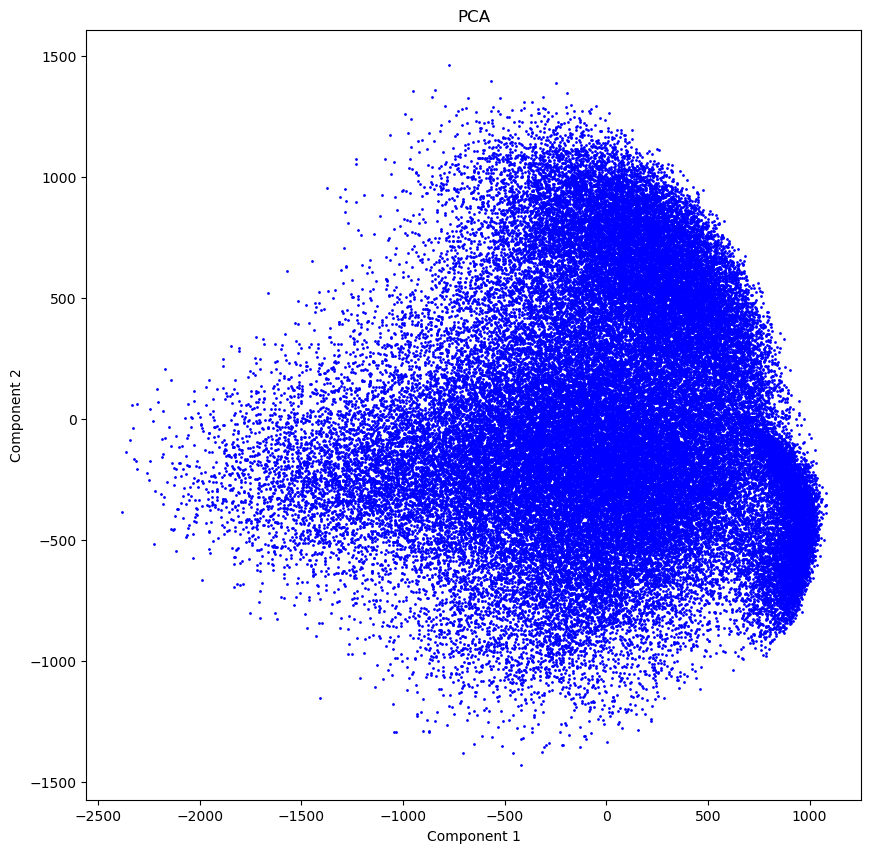

In [50]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# plot PCA
plt.figure(figsize=(10, 10))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='blue', s=1)
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [63]:
X = df.values

n_components_range = range(1, min(X.shape))
mse_scores = []

for n_components in tqdm(n_components_range):
    pca = PCA(n_components)
    X_transformed = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_transformed)
    mse = pca.compute_mse(X, X_reconstructed)
    mse_scores.append(mse)

100%|██████████| 784/784 [55:12<00:00,  4.23s/it]


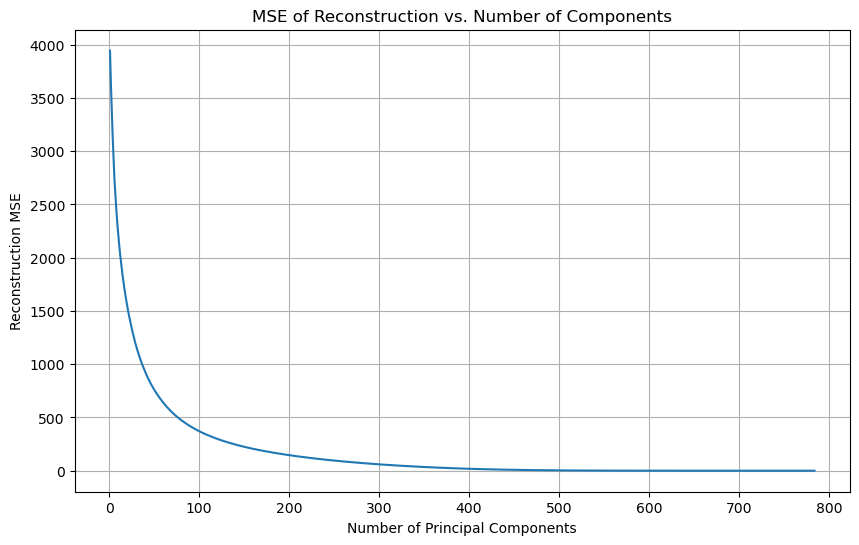

In [64]:
# Plot MSE vs Number of Components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, mse_scores)
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction MSE')
plt.title('MSE of Reconstruction vs. Number of Components')
plt.grid(True)
plt.show()

## (b) 
Seleccionar la cantidad de componentes que considere adecuada y justifique la elección. Usando dicha cantidad de componentes, graficar las imagenes de los digitos originales y reconstruidos para las primeras 10 muestras del dataset.

Basándose en los resultados del gráfico anterior, parecería que lo apropiado sería considerar una cantidad de componentes de entre $100$ y $200$. Esto se debe a que, al principio del gráfico el $MSE$ cae rápidamente al aumentar de cantidad de componentes principales, pero esta caída se vuelve mas gradual, específicamente entre los valores considerados se ve una gran reducción en la pendiente de la curva. A continuación se realizarán los gráficos de la imagen original y la reconstrucción para las primeras $10$ muestras del dataset y analizando estos resultados se elegirá la cantidad de componentes final adecuada

In [90]:
# PCA with 100 components
pca = PCA(n_components=100)
X_transformed = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_transformed)

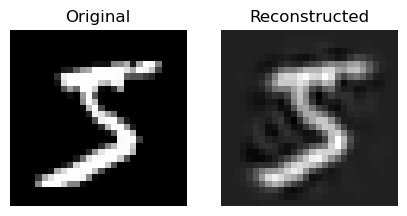

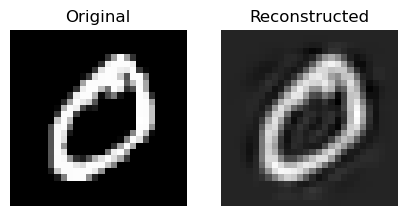

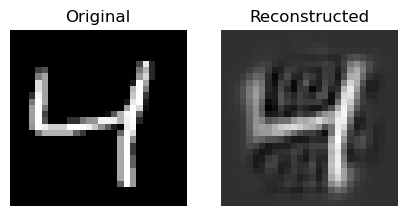

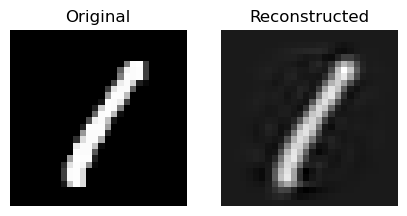

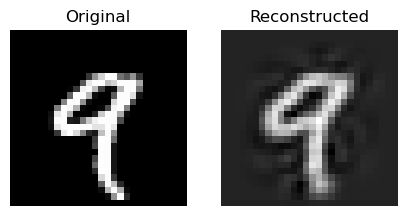

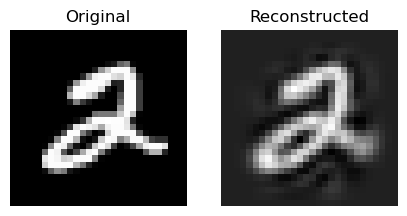

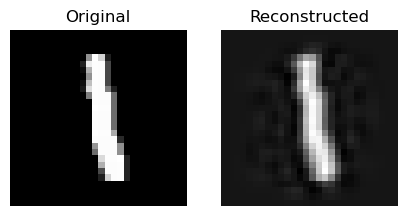

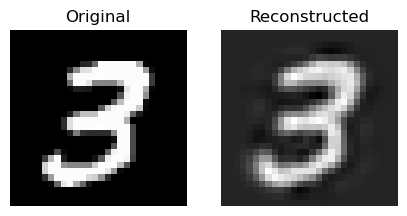

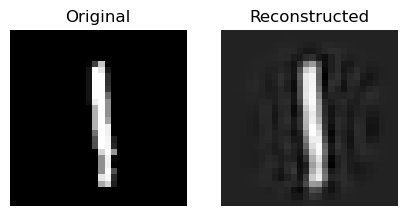

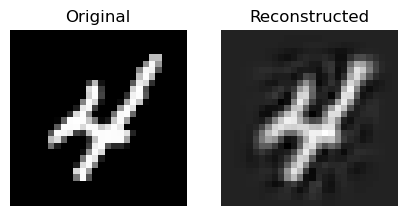

In [91]:
X_re = pd.DataFrame(X_reconstructed, columns=df.columns).drop('label', axis=1)
for i in range(10):
    sample = df.iloc[i].drop('label').values.reshape(28, 28)
    reconstructed = X_re.iloc[i].values.reshape(28, 28)

    plt.figure(figsize=(5, 2.5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

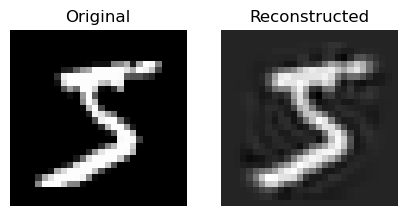

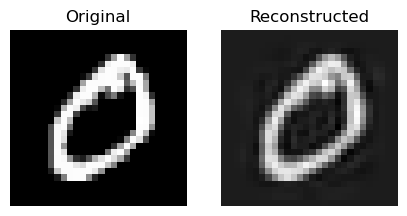

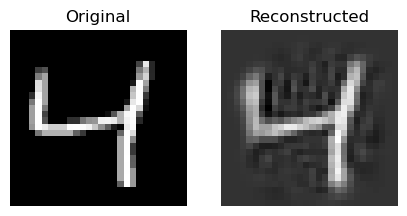

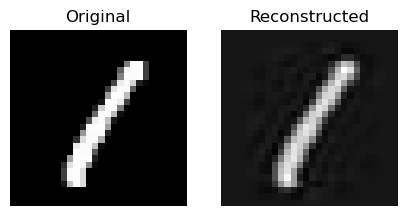

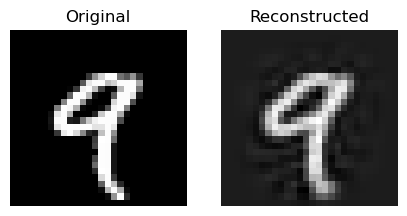

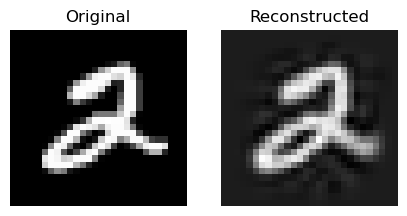

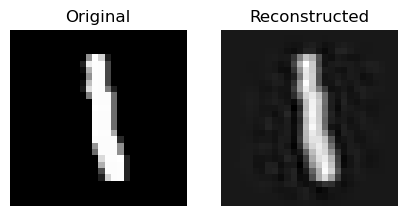

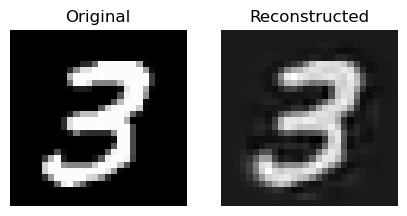

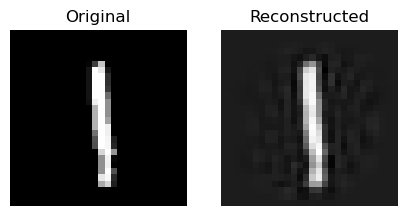

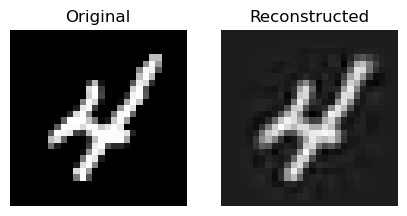

In [93]:
# pca with 150 components
pca = PCA(n_components=150)
X_transformed = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_transformed)
X_re = pd.DataFrame(X_reconstructed, columns=df.columns).drop('label', axis=1)
for i in range(10):
    sample = df.iloc[i].drop('label').values.reshape(28, 28)
    reconstructed = X_re.iloc[i].values.reshape(28, 28)

    plt.figure(figsize=(5, 2.5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

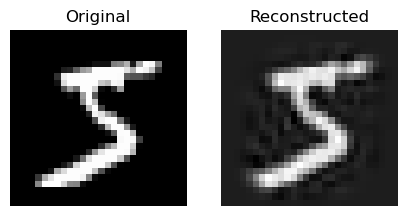

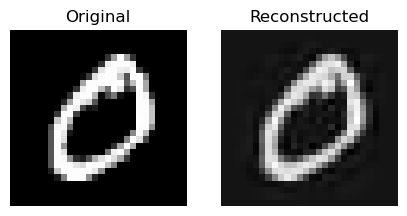

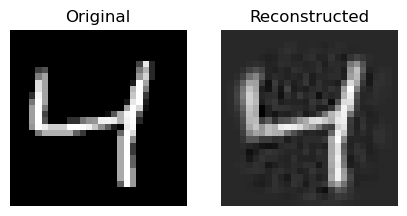

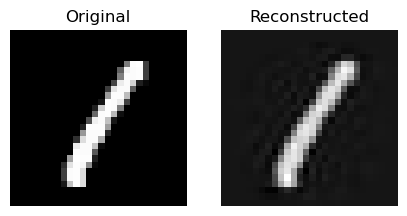

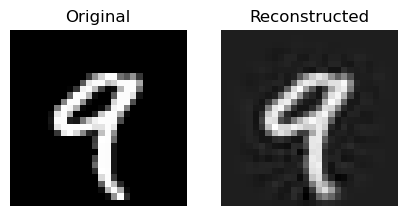

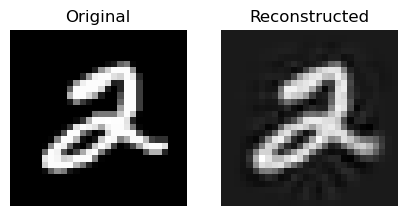

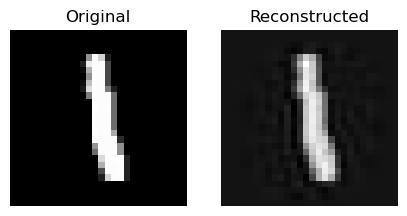

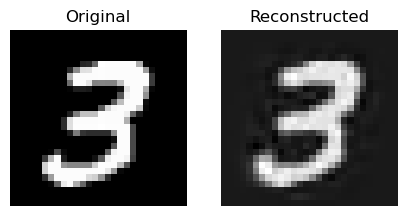

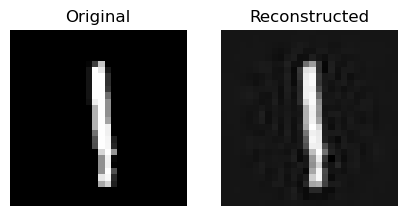

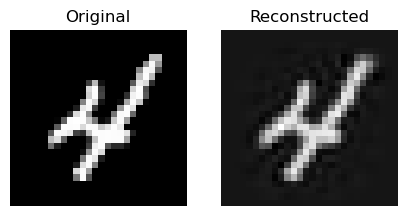

In [94]:
# pca with 200 components
pca = PCA(n_components=200)
X_transformed = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_transformed)

X_re = pd.DataFrame(X_reconstructed, columns=df.columns).drop('label', axis=1)
for i in range(10):
    sample = df.iloc[i].drop('label').values.reshape(28, 28)
    reconstructed = X_re.iloc[i].values.reshape(28, 28)

    plt.figure(figsize=(5, 2.5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

Ya en el primer caso, con $100$ componentes se obtuvieron imágenes de reconstrucción en las que se puede visualizar claramente los números en las $10$ muestras consideradas. Dado esto el número final de componentes a considerar es: $100$.

## (c) 
OPCIONAL: Construir un modelo de autoencoder variacional (VAE) en PyTorch para procesar el conjunto de datos MNIST. Recuerde dividirlo en dos subconjuntos: entrenamiento y validación. El subconjunto de entrenamiento se empleará para entrenar el VAE, mientras que el de validación servirá para ajustar los hiperparámetros y evaluar el error de reconstrucción. Una vez desarrollado el VAE, compare la calidad de las imágenes reconstruidas con las obtenidas mediante PCA en el inciso anterior, utilizando 10 muestras aleatorias del conjunto de validación del VAE.